In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import joblib
import os
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from IPython.display import display, HTML

In [3]:
df_crop_production = pd.read_csv("../../Datasets/OpDataset/crop_production_data.csv")
df_soil_analysis = pd.read_csv("../../Datasets/OpDataset/soil_analysis_data.csv")
df_water_usage = pd.read_csv("../../Datasets/OpDataset/water_usage_data.csv")

def display_df_info(df, df_name):
    info = pd.DataFrame({
        'Column': df.columns,
        'Non-Null Count': [df[col].notnull().sum() for col in df.columns],
        'Dtype': df.dtypes,
        'Unique Values': df.nunique()
    })
    info_html = info.to_html(index=False)
    display(HTML(f"<h3>{df_name}</h3>" + info_html))
    display(HTML(f"<h4>Sample Data</h4>"))
    display(df.head())

In [4]:
display_df_info(df_crop_production, "Crop Production Data")

Column,Non-Null Count,Dtype,Unique Values
District,1000,object,10
Crop,1000,object,23
Season,1000,object,2
Area (hectares),1000,float64,956
Yield (quintals),1000,float64,1000
Production (metric tons),1000,float64,1000


,District,Crop,Season,Area (hectares),Yield (quintals),Production (metric tons)
0,Jodhpur,Wheat,Kharif,16490.142459,30.691986,5061.152230
1,Kota,Gram,Rabi,16943.065614,45.818232,7763.013072
2,Jaipur,Wheat,Rabi,14297.539876,29.752629,4253.893981
3,Hanumangarh,Coriander,Rabi,19737.638447,42.026511,8295.040749
4,Hanumangarh,Citrus,Rabi,13591.576842,38.195933,5191.429648


In [5]:
display_df_info(df_soil_analysis, "Soil Analysis Data")

Column,Non-Null Count,Dtype,Unique Values
District,1000,object,10
Soil Type,1000,object,8
pH Level,1000,float64,1000
Organic Matter (%),1000,float64,1000
Nitrogen Content (kg/ha),1000,float64,1000
Phosphorus Content (kg/ha),1000,float64,1000
Potassium Content (kg/ha),1000,float64,1000


,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha)
0,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766
1,Bhilwara,Nitrogenous,6.832259,2.243018,22.263480,25.413455,37.644377
2,Jodhpur,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003
3,Jaipur,Clay,8.019189,1.240327,15.839222,17.744206,42.758704
4,Jaipur,Sandy,8.100131,1.768419,27.942867,25.769504,30.651292


In [6]:
display_df_info(df_water_usage, "Water Usage Data")

Column,Non-Null Count,Dtype,Unique Values
District,1000,object,10
Crop,1000,object,23
Irrigation Method,1000,object,4
Water Consumption (liters/hectare),1000,float64,1000
Water Availability (liters/hectare),1000,float64,1000


,District,Crop,Irrigation Method,Water Consumption (liters/hectare),Water Availability (liters/hectare)
0,Udaipur,Garlic,Tube Well,11609.330886,11335.919980
1,Bhilwara,Gram,Drip Irrigation,12648.406038,12091.900254
2,Udaipur,Guava,Canal Irrigation,10063.162448,9810.943169
3,Jodhpur,Barley,Sprinkler Irrigation,10110.539993,10754.217313
4,Alwar,Gram,Canal Irrigation,9320.451018,8695.537819


In [7]:
merge_soil_crop_production = df_crop_production.merge(df_soil_analysis, on = ['District'])

In [8]:
merge_water_soil_crop_production = merge_soil_crop_production.merge(df_water_usage, on = ['District', 'Crop'])

In [9]:
database = merge_water_soil_crop_production.copy()
database.tail()

,District,Crop,Season,Area (hectares),Yield (quintals),Production (metric tons),Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Irrigation Method,Water Consumption (liters/hectare),Water Availability (liters/hectare)
433575,Ajmer,Onion,Kharif,16967.70233,42.402728,7194.768632,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Sprinkler Irrigation,14264.932913,14988.961769
433576,Ajmer,Onion,Kharif,16967.70233,42.402728,7194.768632,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Canal Irrigation,11618.405254,11633.677144
433577,Ajmer,Onion,Kharif,16967.70233,42.402728,7194.768632,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Sprinkler Irrigation,10593.992074,11165.941371
433578,Ajmer,Onion,Kharif,16967.70233,42.402728,7194.768632,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Tube Well,15252.106647,15357.754437
433579,Ajmer,Onion,Kharif,16967.70233,42.402728,7194.768632,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Drip Irrigation,11927.850413,11650.678989


In [10]:
database = database.drop(columns = ['Production (metric tons)', 'Water Consumption (liters/hectare)'], axis = 1)
database.tail()

,District,Crop,Season,Area (hectares),Yield (quintals),Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Irrigation Method,Water Availability (liters/hectare)
433575,Ajmer,Onion,Kharif,16967.70233,42.402728,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Sprinkler Irrigation,14988.961769
433576,Ajmer,Onion,Kharif,16967.70233,42.402728,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Canal Irrigation,11633.677144
433577,Ajmer,Onion,Kharif,16967.70233,42.402728,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Sprinkler Irrigation,11165.941371
433578,Ajmer,Onion,Kharif,16967.70233,42.402728,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Tube Well,15357.754437
433579,Ajmer,Onion,Kharif,16967.70233,42.402728,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,Drip Irrigation,11650.678989


In [11]:
database.isnull().sum()

District                               0
Crop                                   0
Season                                 0
Area (hectares)                        0
Yield (quintals)                       0
Soil Type                              0
pH Level                               0
Organic Matter (%)                     0
Nitrogen Content (kg/ha)               0
Phosphorus Content (kg/ha)             0
Potassium Content (kg/ha)              0
Irrigation Method                      0
Water Availability (liters/hectare)    0
dtype: int64

In [12]:
database.duplicated().sum()

0

In [13]:
X = database.drop(columns=['Yield (quintals)'])  # Features
y = database['Yield (quintals)']  # Target

In [14]:
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['District', 'Crop', 'Season', 'Soil Type', 'Irrigation Method']])
feature_names = encoder.get_feature_names_out(['District', 'Crop', 'Season', 'Soil Type', 'Irrigation Method'])
X_categorical = pd.DataFrame(X_encoded.toarray(), columns=feature_names)
X_numeric = X.drop(columns=['District', 'Crop', 'Season', 'Soil Type', 'Irrigation Method'])
#print(feature_names)
#print(X_categorical.iloc[0])

In [15]:
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

In [16]:
X_processed = pd.concat([X_categorical, X_numeric], axis=1)
X_processed.head()

,District_Ajmer,District_Alwar,District_Bhilwara,District_Hanumangarh,District_Jaipur,District_Jodhpur,District_Kota,District_Nagaur,District_Sri Ganganagar,District_Udaipur,...,Irrigation Method_Drip Irrigation,Irrigation Method_Sprinkler Irrigation,Irrigation Method_Tube Well,Area (hectares),pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Water Availability (liters/hectare)
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,16490.142459,7.453182,2.662898,23.564182,13.014409,37.082003,10557.488279
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,16490.142459,7.453182,2.662898,23.564182,13.014409,37.082003,14448.126887
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,16490.142459,7.453182,2.662898,23.564182,13.014409,37.082003,8512.323275
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,16490.142459,7.453182,2.662898,23.564182,13.014409,37.082003,9434.989877
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,16490.142459,7.305740,2.095212,32.246094,17.450967,40.172205,10557.488279


In [17]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [19]:
#joblib.dump(scaler, 'scaler.pkl')

In [20]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled shape:", X_val_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (260148, 54)
X_val_scaled shape: (86716, 54)
X_test_scaled shape: (86716, 54)


In [21]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_reshaped = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [22]:
# Define the CNN mode

In [23]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

In [24]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [25]:
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/20
8130/8130 [==============================] - 202s 25ms/step - loss: 69.0841 - mae: 6.9127 - val_loss: 62.9519 - val_mae: 6.6110
Epoch 2/20
8130/8130 [==============================] - 189s 23ms/step - loss: 56.7843 - mae: 6.1782 - val_loss: 47.5405 - val_mae: 5.5329
Epoch 3/20
8130/8130 [==============================] - 175s 22ms/step - loss: 42.9088 - mae: 5.2201 - val_loss: 37.0310 - val_mae: 4.7855
Epoch 4/20
8130/8130 [==============================] - 181s 22ms/step - loss: 33.0182 - mae: 4.4435 - val_loss: 29.4343 - val_mae: 4.1521
Epoch 5/20
8130/8130 [==============================] - 185s 23ms/step - loss: 27.3260 - mae: 3.9297 - val_loss: 25.2112 - val_mae: 3.7673
Epoch 6/20
8130/8130 [==============================] - 188s 23ms/step - loss: 22.4892 - mae: 3.4640 - val_loss: 20.4337 - val_mae: 3.2355
Epoch 7/20
8130/8130 [==============================] - 197s 24ms/step - loss: 17.7458 - mae: 2.9599 - val_loss: 15.9319 - val_mae: 2.7522
Epoch 8/20
8130/8130 [=====

In [26]:
mse, mae = model.evaluate(X_test_reshaped, y_test)

2710/2710 [==============================] - 16s 6ms/step - loss: 4.8013 - mae: 1.3672


In [27]:
predictions = model.predict(X_test_reshaped)

2710/2710 [==============================] - 13s 5ms/step


In [28]:
r2_test = r2_score(y_test, predictions)

In [29]:
print(f"Mean Square Error: {mse:.4f}")
print(f"Root Mean Square Error: {np.sqrt(mse):.4f}")
print(f"R2 Score: {r2_test:.4f}")

Mean Square Error: 4.8013
Root Mean Square Error: 2.1912
R2 Score: 0.9298


In [30]:
# Plotting actual vs. predicted values

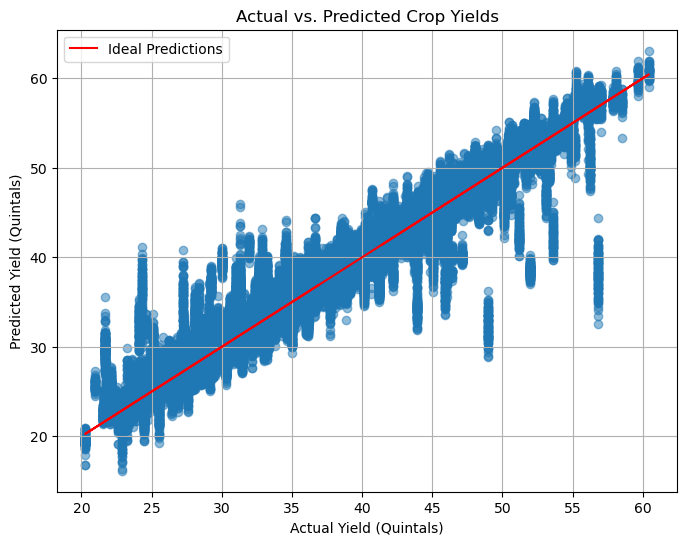

In [35]:
cwd = os.getcwd()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot(y_test, y_test, color='red', label='Ideal Predictions')
plt.title('Actual vs. Predicted Crop Yields')
plt.xlabel('Actual Yield (Quintals)')
plt.ylabel('Predicted Yield (Quintals)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(cwd, "RsquaredCNN.png"))
plt.show()

In [91]:
#model.save('model.h5')  # Save the entire model